# Chapter 11 - The Linear Regression

## Listing 11-1. Importing the data and plotting it

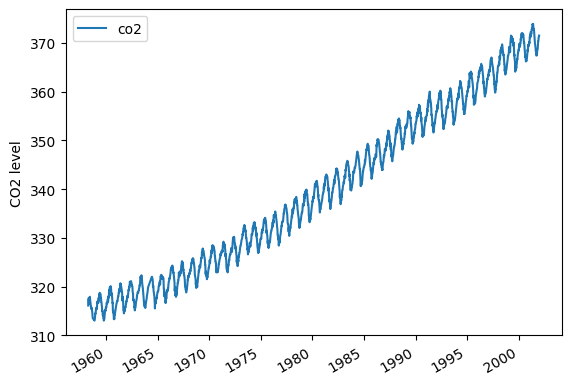

In [1]:
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt

data = sm.datasets.co2.load_pandas()
co2 = data.data
co2 = co2.dropna()
ax = co2.plot()
ax.set_ylabel('CO2 level')
plt.show()


## Listing 11-2. Creating the variable month

In [2]:
co2['month'] = [x.month for x in co2.index] 

C:\Users\ALBER\AppData\Local\Temp\ipykernel_20460\27764350.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  co2['month'] = [x.month for x in co2.index]


## Listing 11-3. Creating the variable year

In [3]:
co2['year'] = [x.year for x in co2.index] 

C:\Users\ALBER\AppData\Local\Temp\ipykernel_20460\3206968955.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  co2['year'] = [x.year for x in co2.index]


## Listing 11-4. Fitting a Linear Regression with two variables

0.9690528910892225 0.3433251233951542


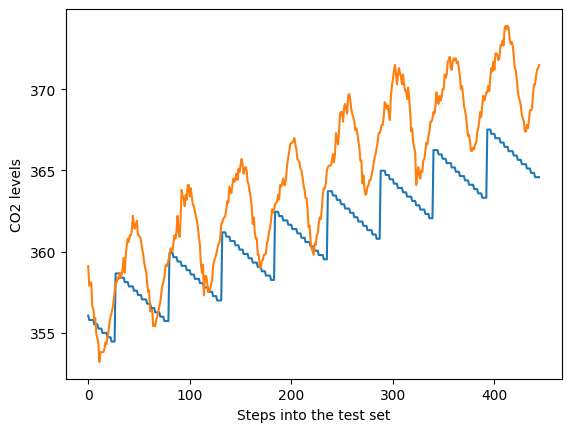

In [4]:
# Create X and y objects
X = co2[['year', 'month']]
y = co2['co2']

# Create Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=12345,shuffle=False)

# Fit model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

my_lm = LinearRegression()
my_lm.fit(X = X_train, y = y_train)

train_fcst = my_lm.predict(X_train)
test_fcst = my_lm.predict(X_test)

train_r2 = r2_score(y_train, train_fcst)
test_r2 = r2_score(y_test, test_fcst)

print(train_r2, test_r2)

# Plot result
plt.plot(list(test_fcst))
plt.plot(list(y_test))
plt.xlabel('Steps into the test set')
plt.ylabel('CO2 levels')
plt.show()


## Listing 11-4. Adding lagged variables into the data

In [5]:
co2['co2_l1'] = co2['co2'].shift(1)
co2['co2_l2'] = co2['co2'].shift(2)
co2['co2_l3'] = co2['co2'].shift(3)
co2['co2_l4'] = co2['co2'].shift(4)
co2['co2_l5'] = co2['co2'].shift(5)


C:\Users\ALBER\AppData\Local\Temp\ipykernel_20460\3081521428.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  co2['co2_l1'] = co2['co2'].shift(1)
C:\Users\ALBER\AppData\Local\Temp\ipykernel_20460\3081521428.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  co2['co2_l2'] = co2['co2'].shift(2)
C:\Users\ALBER\AppData\Local\Temp\ipykernel_20460\3081521428.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

## Listing 11-5. Drop missing values

In [6]:
co2 = co2.dropna()

## Listing 11-6. Fitting the full Linear Regression model

0.998797756425323 0.9904370120462793


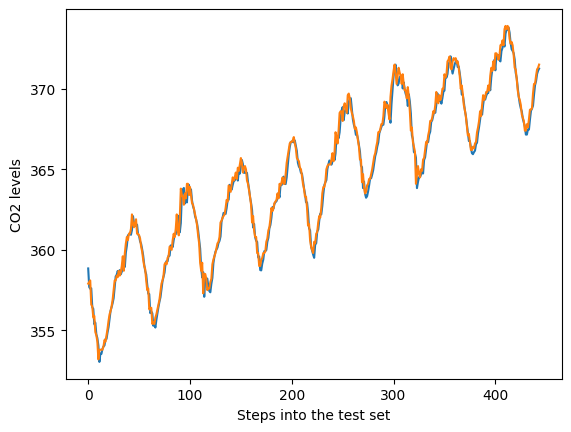

In [7]:
# Create X and y objects
X = co2[['year', 'month', 'co2_l1', 'co2_l2', 'co2_l3', 'co2_l4', 'co2_l5']]
y = co2['co2']

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=12345,shuffle=False)

# Fit the model
my_lm = LinearRegression()
my_lm.fit(X = X_train, y = y_train)

train_fcst = my_lm.predict(X_train)
test_fcst = my_lm.predict(X_test)

train_r2 = r2_score(y_train, train_fcst)
test_r2 = r2_score(y_test, test_fcst)

print(train_r2, test_r2)

# Plot result
plt.plot(list(test_fcst))
plt.plot(list(y_test))
plt.xlabel('Steps into the test set')
plt.ylabel('CO2 levels')
plt.show()


# Chapter 12 - The Decision Tree

## Listing 12-1. Import the bike data

In [8]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
# fetch dataset 
bike_sharing = fetch_ucirepo(id=275) 
  
# data (as pandas dataframes) 
X = bike_sharing.data.features 
y = bike_sharing.data.targets 
  
# metadata 
print(bike_sharing.metadata) 
  
# variable information 
print(bike_sharing.variables) 

# Merge the features and target into a single DataFrame
data = pd.concat([X, y], axis=1)

data.head()

{'uci_id': 275, 'name': 'Bike Sharing', 'repository_url': 'https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/275/data.csv', 'abstract': 'This dataset contains the hourly and daily count of rental bikes between years 2011 and 2012 in Capital bikeshare system with the corresponding weather and seasonal information.', 'area': 'Social Science', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 17389, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['cnt'], 'index_col': ['instant'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2013, 'last_updated': 'Sun Mar 10 2024', 'dataset_doi': '10.24432/C5W894', 'creators': ['Hadi Fanaee-T'], 'intro_paper': {'title': 'Event labeling combining ensemble detectors and background knowledge', 'authors': 'Hadi Fanaee-T, João Gama', 'published_in': 'Progress in Artificial Intelli

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


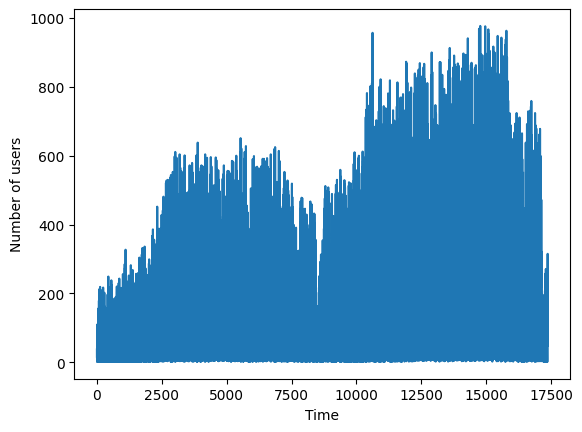

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

ax = data['cnt'].plot()
ax.set_ylabel('Number of users')
ax.set_xlabel('Time')
plt.show()

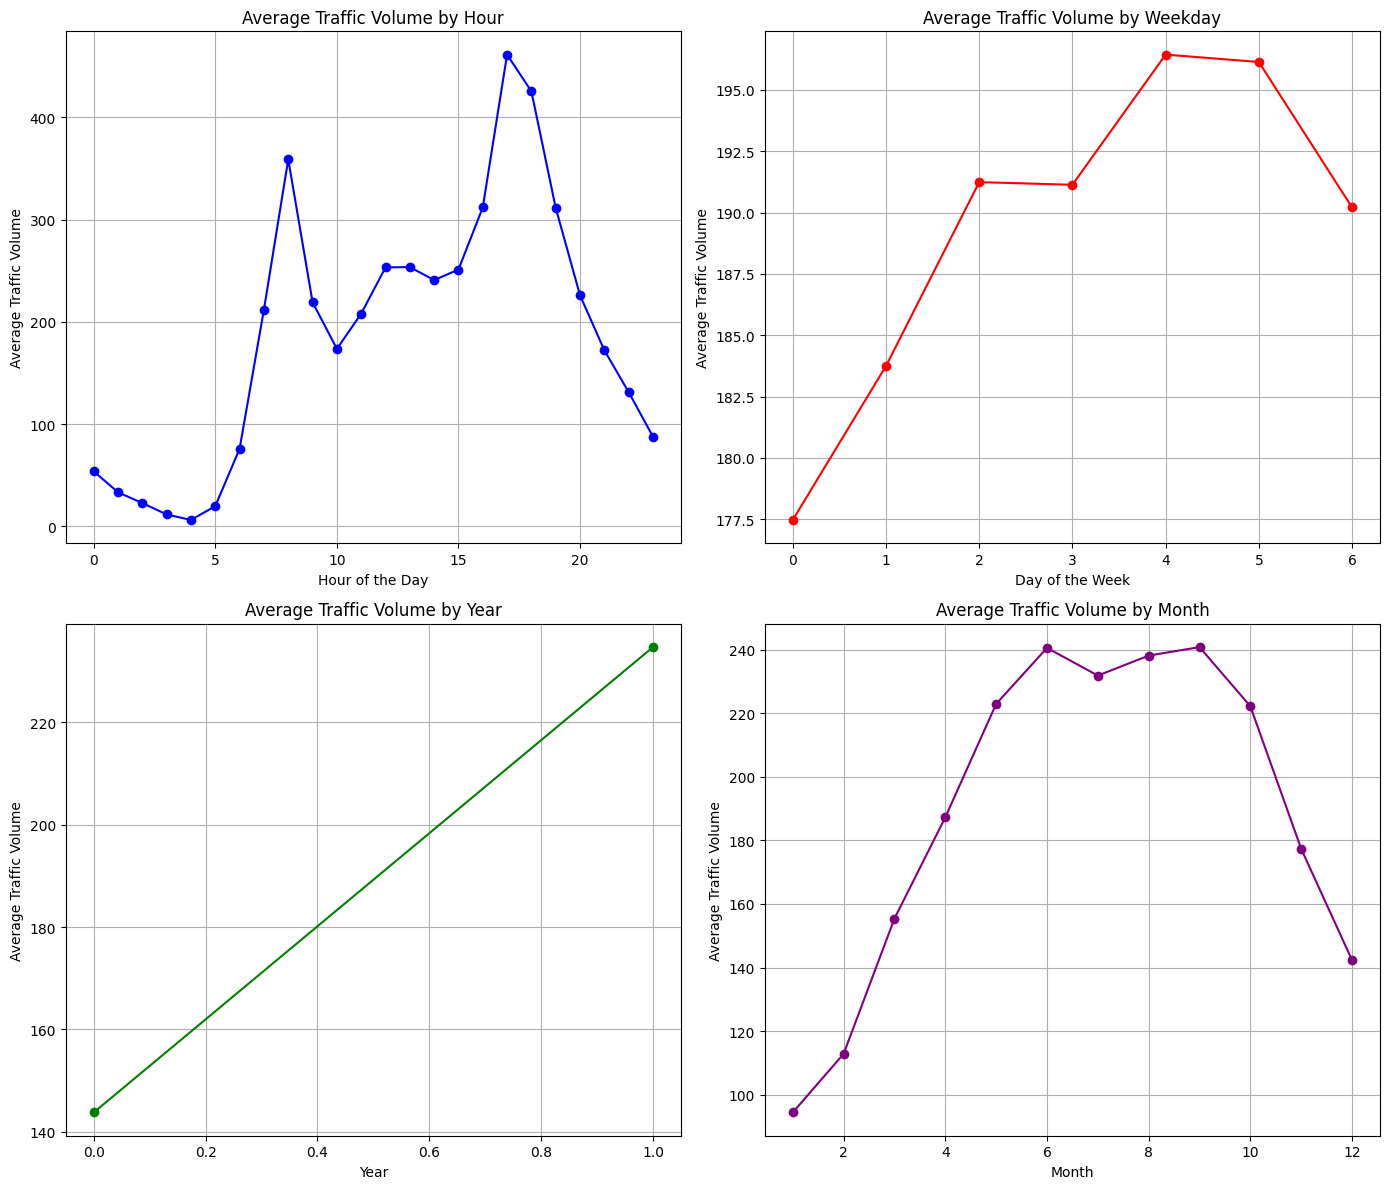

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

# Load your data
# data = pd.read_csv('path_to_your_data.csv')

# Creating a figure with a grid of 2x2 subplots
plt.figure(figsize=(14, 12))

# Plotting 'traffic_volume' against 'hour'
plt.subplot(2, 2, 1)  # Top-left subplot
plt.plot(data.groupby('hr')['cnt'].mean(), marker='o', linestyle='-', color='b')
plt.title('Average Traffic Volume by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Traffic Volume')
plt.grid(True)

# Plotting 'traffic_volume' against 'weekday'
plt.subplot(2, 2, 2)  # Top-right subplot
plt.plot(data.groupby('weekday')['cnt'].mean(), marker='o', linestyle='-', color='r')
plt.title('Average Traffic Volume by Weekday')
plt.xlabel('Day of the Week')
plt.ylabel('Average Traffic Volume')
plt.grid(True)

# Plotting 'traffic_volume' against 'year'
plt.subplot(2, 2, 3)  # Bottom-left subplot
plt.plot(data.groupby('yr')['cnt'].mean(), marker='o', linestyle='-', color='g')
plt.title('Average Traffic Volume by Year')
plt.xlabel('Year')
plt.ylabel('Average Traffic Volume')
plt.grid(True)

# Plotting 'traffic_volume' against 'month'
plt.subplot(2, 2, 4)  # Bottom-right subplot
plt.plot(data.groupby('mnth')['cnt'].mean(), marker='o', linestyle='-', color='purple')
plt.title('Average Traffic Volume by Month')
plt.xlabel('Month')
plt.ylabel('Average Traffic Volume')
plt.grid(True)

# Adjust layout and show plot
plt.tight_layout()
plt.show()


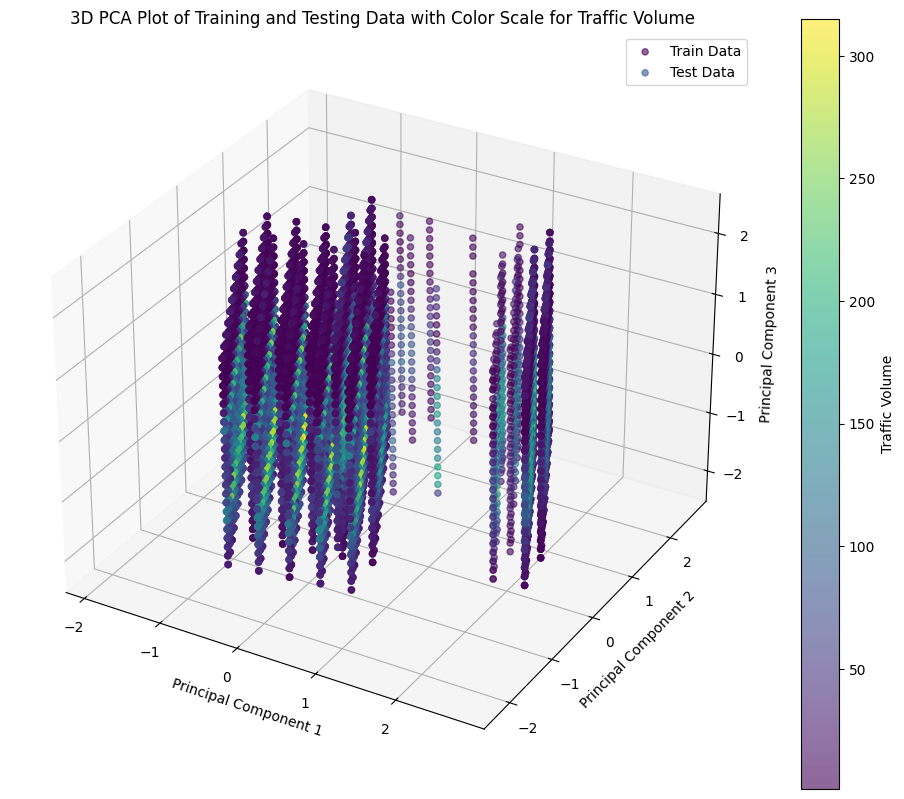

In [11]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load your data
# data = pd.read_csv('path_to_your_data.csv')
# Example structure of data assumed as mentioned earlier
X = data[['yr', 'mnth', 'weekday', 'hr', 'workingday']]
y = data['cnt']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=100, random_state=12345, shuffle=False)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# PCA to reduce dimensions to 3
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Plotting the results in 3D
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Create a color map
cm = plt.get_cmap('viridis')

# Scale the target variable between 0 and 1 for the colormap
sc = ax.scatter(X_train_pca[:, 0], X_train_pca[:, 1], X_train_pca[:, 2], c=y_train, cmap=cm, label='Train Data', alpha=0.6)
sc = ax.scatter(X_test_pca[:, 0], X_test_pca[:, 1], X_test_pca[:, 2], c=y_test, cmap=cm, label='Test Data', alpha=0.6)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.colorbar(sc, ax=ax, label='Traffic Volume')

ax.legend()

plt.title('3D PCA Plot of Training and Testing Data with Color Scale for Traffic Volume')
plt.show()

## Listing 12-2. Creating the training dataset

In [12]:
# 7 last days of user count (autoregression)
data['usersL1'] = data['cnt'].shift(1)
data['usersL2'] = data['cnt'].shift(2)
data['usersL3'] = data['cnt'].shift(3)
data['usersL4'] = data['cnt'].shift(4)
data['usersL5'] = data['cnt'].shift(5)
data['usersL6'] = data['cnt'].shift(6)
data['usersL7'] = data['cnt'].shift(7)

# 7 last days of weathersit
data['weatherL1'] = data['weathersit'].shift(1)
data['weatherL2'] = data['weathersit'].shift(2)
data['weatherL3'] = data['weathersit'].shift(3)
data['weatherL4'] = data['weathersit'].shift(4)
data['weatherL5'] = data['weathersit'].shift(5)
data['weatherL6'] = data['weathersit'].shift(6)
data['weatherL7'] = data['weathersit'].shift(7)

# 7 last days of temperature
data['tempL1'] = data['temp'].shift(1)
data['tempL2'] = data['temp'].shift(2)
data['tempL3'] = data['temp'].shift(3)
data['tempL4'] = data['temp'].shift(4)
data['tempL5'] = data['temp'].shift(5)
data['tempL6'] = data['temp'].shift(6)
data['tempL7'] = data['temp'].shift(7)

# 7 last days of humidity
data['humL1'] = data['hum'].shift(1)
data['humL2'] = data['hum'].shift(2)
data['humL3'] = data['hum'].shift(3)
data['humL4'] = data['hum'].shift(4)
data['humL5'] = data['hum'].shift(5)
data['humL6'] = data['hum'].shift(6)
data['humL7'] = data['hum'].shift(7)

data = data.dropna()
data = data.drop(477)

X = data[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 
          'weatherL1', 'weatherL2', 'weatherL3', 'weatherL4', 'weatherL5', 'weatherL6', 'weatherL7',
         'usersL1','usersL2', 'usersL3', 'usersL4', 'usersL5', 'usersL6', 'usersL7',
         'tempL1', 'tempL2', 'tempL3', 'tempL4', 'tempL5', 'tempL6', 'tempL7',
         'humL1', 'humL2','humL3', 'humL4', 'humL5', 'humL6', 'humL7']]

y = data['cnt']


## Listing 12-3. Fitting the model

In [13]:
# Create Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=12345, shuffle=False)

from sklearn.tree import DecisionTreeRegressor
my_dt = DecisionTreeRegressor(random_state=12345)
my_dt.fit(X_train, y_train)

from sklearn.metrics import r2_score
print(r2_score(list(y_test), list(my_dt.predict(X_test))))


0.8782118611261032


In [14]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


0.8903337736903699


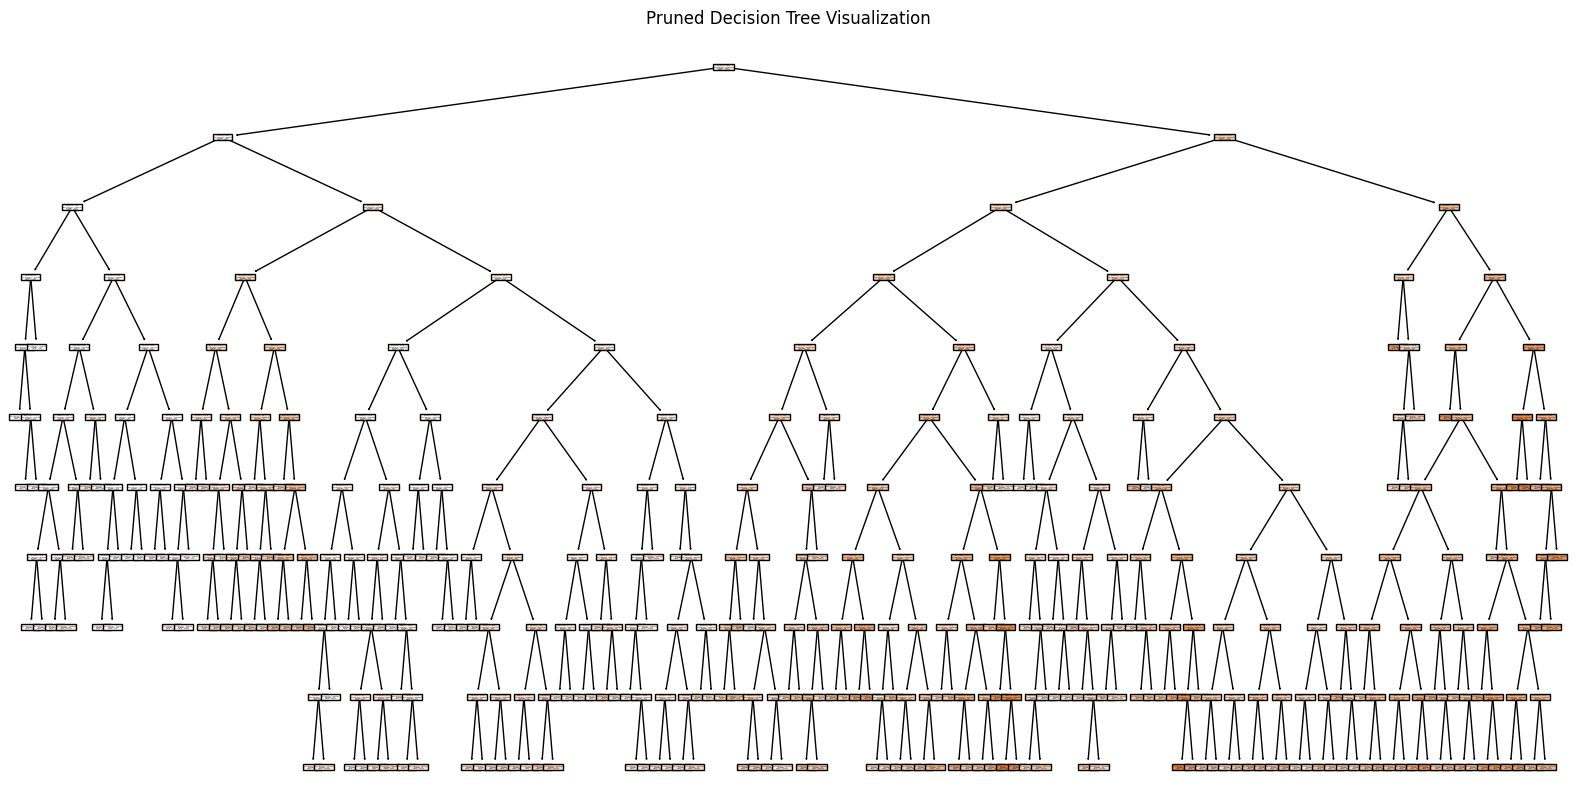

In [15]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.tree import plot_tree

# Assuming you have already prepared X and y from your dataset

# Create Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=12345, shuffle=False)

from sklearn.tree import DecisionTreeRegressor

# Initialize the DecisionTreeRegressor with specific parameters to regularize the tree
my_dt = DecisionTreeRegressor(
    max_depth=10,                # Limits depth of the tree
    min_samples_split=15,       # Requires at least 20 samples to consider a split
    min_samples_leaf=5,        # Requires at least 10 samples per leaf
    max_leaf_nodes=200,         # Maximum number of leaf nodes
)
my_dt.fit(X_train, y_train)  # Fit to training data


# Predict and calculate R2 score
predictions = my_dt.predict(X_test)
print(r2_score(y_test, predictions))

# Plot the decision tree
plt.figure(figsize=(20,10))  # Set the size of the plot according to your preference
plot_tree(my_dt, feature_names=X.columns, filled=True)
plt.title('Pruned Decision Tree Visualization')
plt.show()




## Cost complexity Pruning

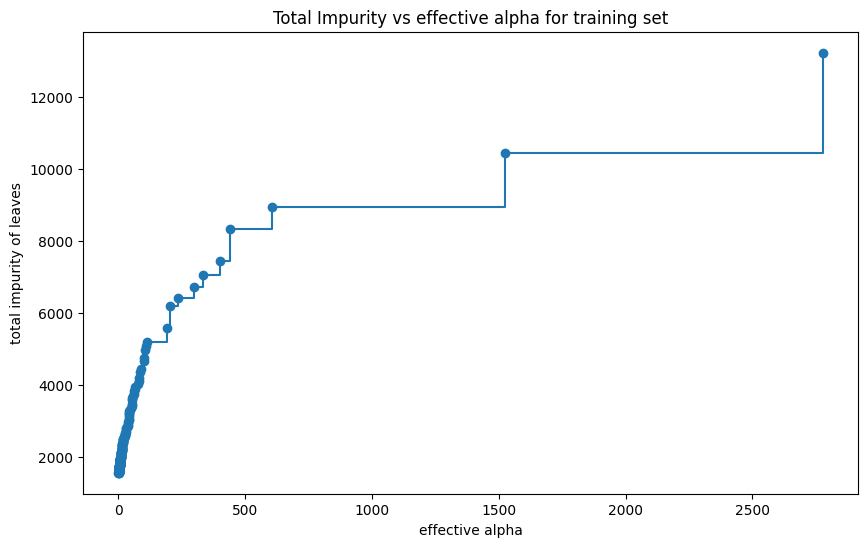

MSE after pruning: 10964.811487153964
MAE after pruning: 67.59328721795409
0.7745128236621124


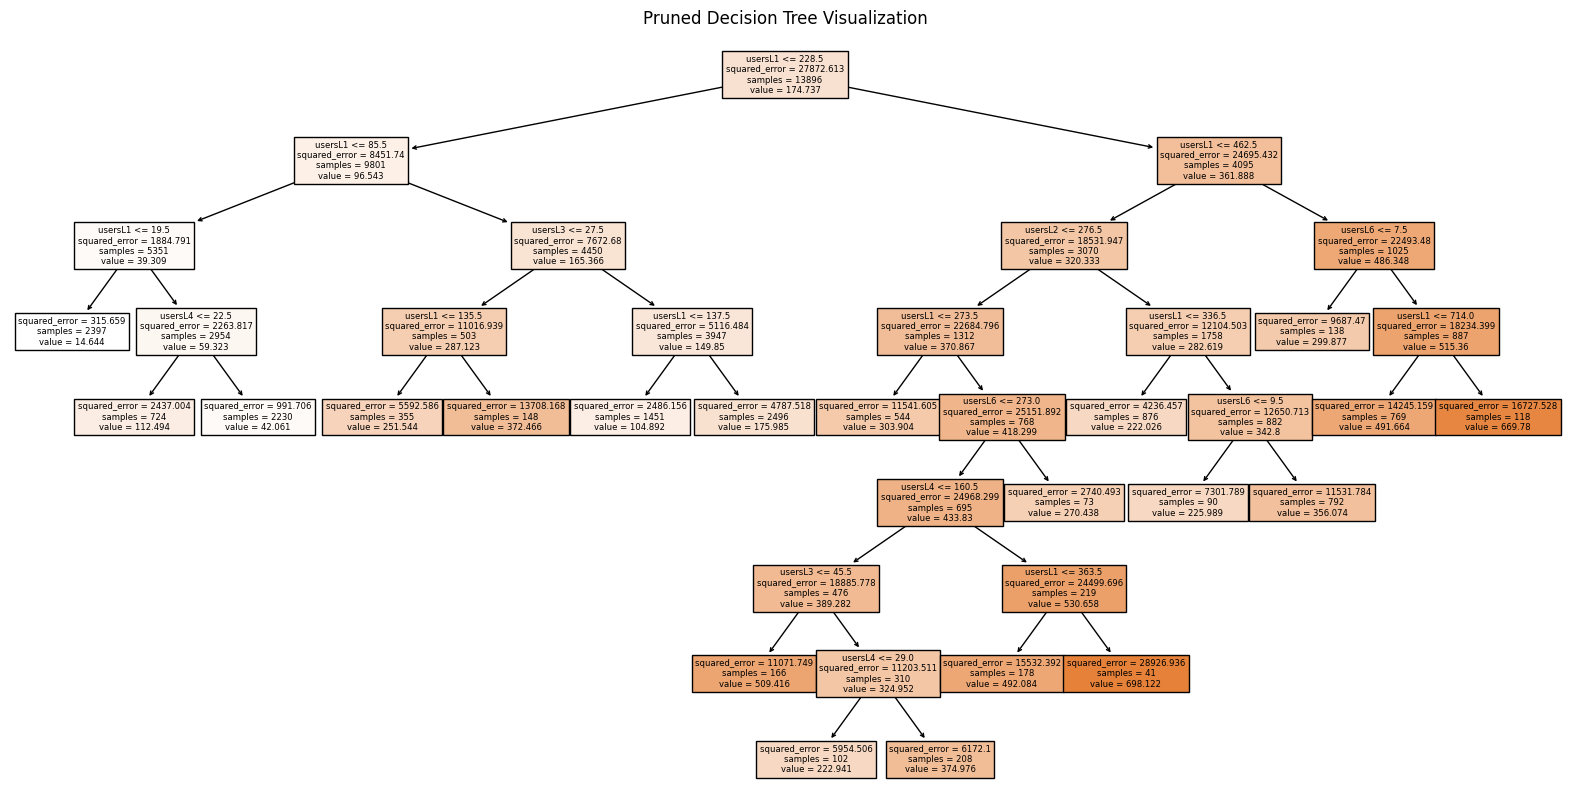

In [16]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error , mean_absolute_error, r2_score

# Assuming X_train, y_train have been defined
# Initialize the DecisionTreeRegressor with specific parameters to regularize the tree
my_dt = DecisionTreeRegressor(
    max_depth=10,                # Limits depth of the tree
    min_samples_split=15,       # Requires at least 15 samples to consider a split
    min_samples_leaf=5,         # Requires at least 5 samples per leaf
    max_leaf_nodes=200          # Maximum number of leaf nodes
)

# Fit to training data
my_dt.fit(X_train, y_train)

# Get the cost complexity pruning path
path = my_dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Plot the ccp_alpha vs impurities
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
plt.xlabel("effective alpha")
plt.ylabel("total impurity of leaves")
plt.title("Total Impurity vs effective alpha for training set")
plt.show()

# You might choose an alpha value based on this plot or further analysis
# Here we select an alpha somewhere from the plot - this would be updated based on analysis
alpha_selected = ccp_alphas[10]  # Example: select the 10th alpha

# Re-train the tree with the selected alpha
my_dt_pruned = DecisionTreeRegressor(
    random_state=44,
    max_depth=10,
    min_samples_split=15,
    min_samples_leaf=5,
    max_leaf_nodes=20,
    ccp_alpha=20
)
my_dt_pruned.fit(X_train, y_train)

# Evaluate the pruned tree
y_pred = my_dt_pruned.predict(X_test)
print("MSE after pruning:", mean_squared_error(y_test, y_pred))
print("MAE after pruning:", mean_absolute_error(y_test, y_pred))
print(r2_score(list(y_test), list(my_dt_pruned.predict(X_test))))

# Plot the decision tree
plt.figure(figsize=(20,10))  # Set the size of the plot according to your preference
plot_tree(my_dt_pruned, feature_names=X.columns, filled=True)
plt.title('Pruned Decision Tree Visualization')
plt.show()



## Listing 12-4. Adding a grid search

In [17]:
from sklearn.model_selection import GridSearchCV

my_dt = GridSearchCV(DecisionTreeRegressor(random_state=44), 
                 {'min_samples_split': list(range(20,50, 2)),
                 'max_features': [0.6, 0.7, 0.8, 0.9, 1.],
                 'criterion': ['squared_error', 'absolute_error']},
                scoring = 'r2', n_jobs = -1)

my_dt.fit(X_train, y_train)
print(r2_score(list(y_test), list(my_dt.predict(X_test))))


0.8777882676774039


## Listing 12-5. Finding the best parameters

In [18]:
print(my_dt.best_estimator_)

DecisionTreeRegressor(max_features=0.9, min_samples_split=32, random_state=44)


## Listing 12-6. Plotting the prediction

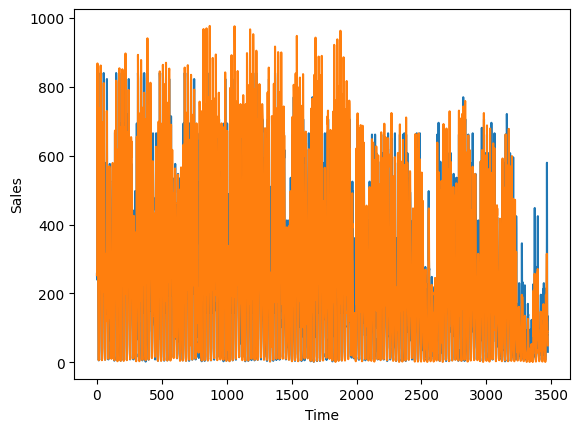

In [19]:
fcst = my_dt.predict(X_test)

plt.plot(list(fcst))
plt.plot(list(y_test))
plt.ylabel('Sales')
plt.xlabel('Time')
plt.show()


## Listing 12-7. Plotting the prediction

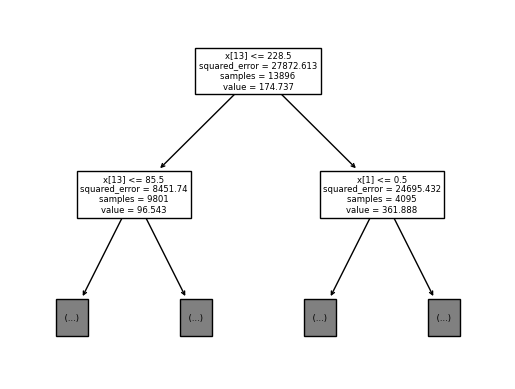

In [20]:
from sklearn.tree import plot_tree
plot_tree(my_dt.best_estimator_, max_depth=1)
plt.show()


# Chapter 13 - The kNN Model

## Listing 13-1. Import the traffic data

https://archive.ics.uci.edu/dataset/492/metro+interstate+traffic+volume

In [21]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [22]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
# fetch dataset 
metro_interstate_traffic_volume = fetch_ucirepo(id=492) 
  
# data (as pandas dataframes) 
X = metro_interstate_traffic_volume.data.features 
y = metro_interstate_traffic_volume.data.targets 
  
# metadata 
print(metro_interstate_traffic_volume.metadata) 
  
# variable information 
print(metro_interstate_traffic_volume.variables) 

# Merge the features and target into a single DataFrame
data = pd.concat([X, y], axis=1)

data.head()

{'uci_id': 492, 'name': 'Metro Interstate Traffic Volume', 'repository_url': 'https://archive.ics.uci.edu/dataset/492/metro+interstate+traffic+volume', 'data_url': 'https://archive.ics.uci.edu/static/public/492/data.csv', 'abstract': 'Hourly Minneapolis-St Paul, MN traffic volume for westbound I-94. Includes weather and holiday features from 2012-2018.', 'area': 'Other', 'tasks': ['Regression'], 'characteristics': ['Multivariate', 'Sequential', 'Time-Series'], 'num_instances': 48204, 'num_features': 8, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['traffic_volume'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2019, 'last_updated': 'Fri Mar 15 2024', 'dataset_doi': '10.24432/C5X60B', 'creators': ['John Hogue'], 'intro_paper': None, 'additional_info': {'summary': 'Hourly Interstate 94 Westbound traffic volume for MN DoT ATR station 301, roughly midway between Minneapolis and St Paul, MN. Hourly weath

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


## Listing 13-2. Feature engineering to create the additional explanaotry variables

In [23]:
data['year'] = data['date_time'].apply(lambda x: x[:4])
data['month'] = data['date_time'].apply(lambda x: x[5:7])
data['weekday'] = pd.to_datetime(data['date_time']).apply(lambda x: x.weekday())
data['hour'] = pd.to_datetime(data['date_time']).apply(lambda x: x.hour)
data['isholiday'] = (data['holiday'] == 'None').apply(float)

In [24]:
data

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,year,month,weekday,hour,isholiday
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,2012,10,1,9,0.0
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,2012,10,1,10,0.0
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,2012,10,1,11,0.0
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,2012,10,1,12,0.0
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,2012,10,1,13,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48199,NaN,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543,2018,09,6,19,0.0
48200,NaN,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781,2018,09,6,20,0.0
48201,NaN,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159,2018,09,6,21,0.0
48202,NaN,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450,2018,09,6,22,0.0


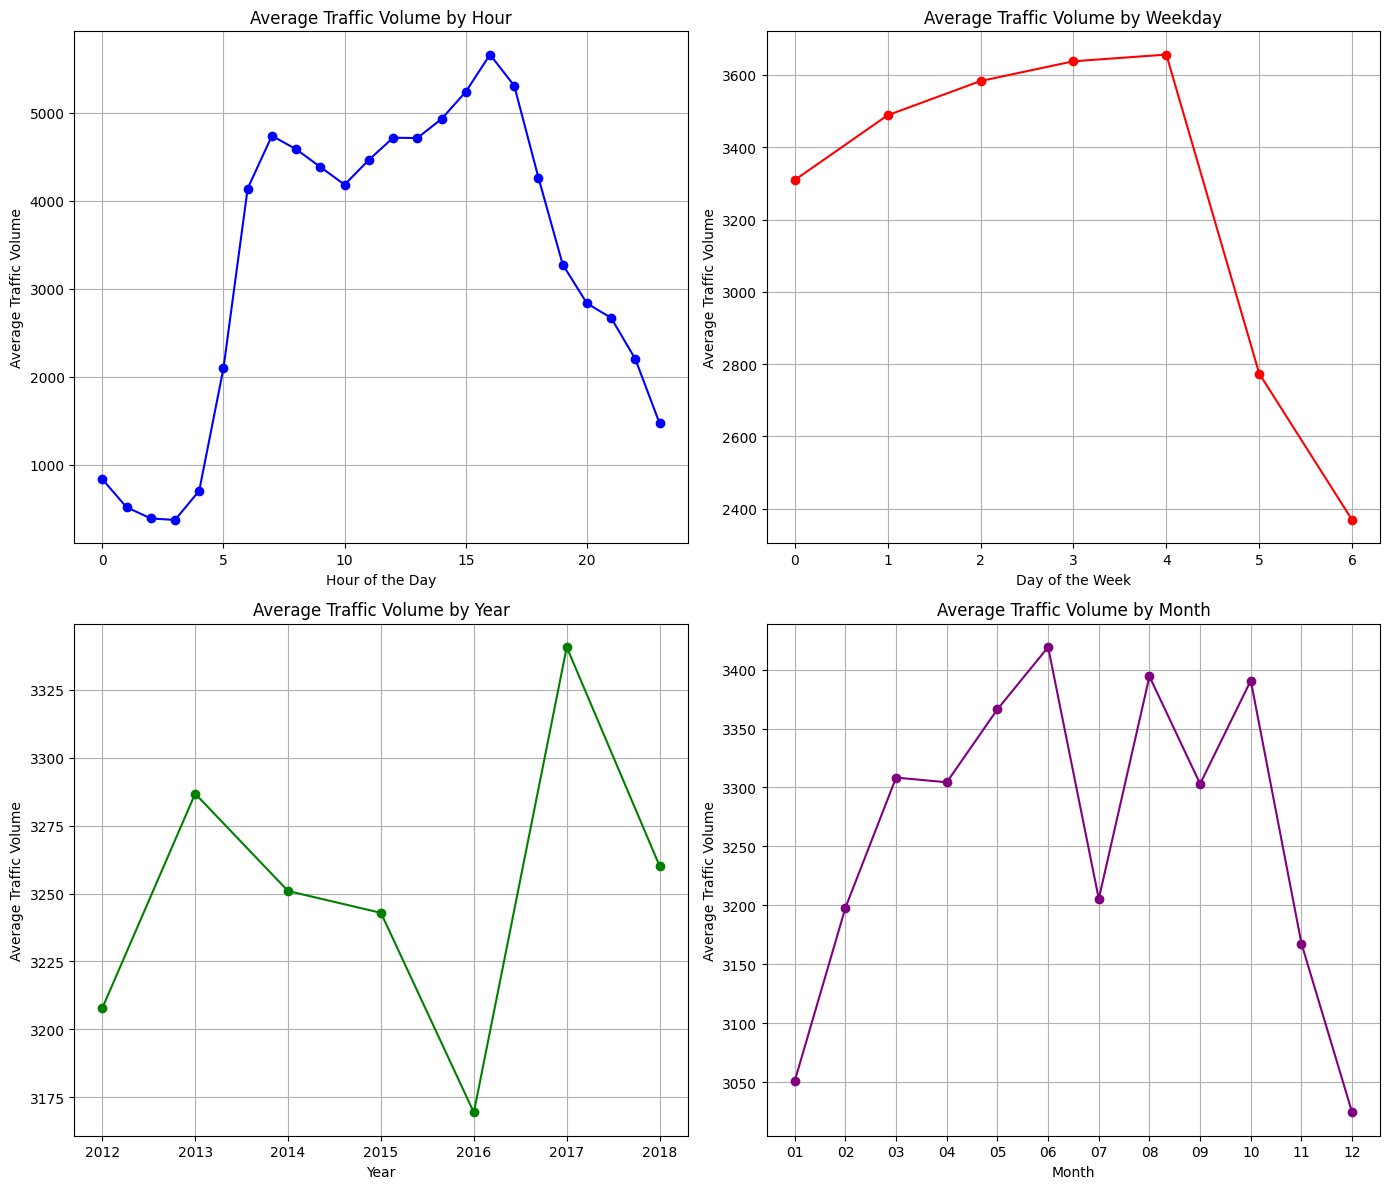

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

# Load your data
# data = pd.read_csv('path_to_your_data.csv')

# Creating a figure with a grid of 2x2 subplots
plt.figure(figsize=(14, 12))

# Plotting 'traffic_volume' against 'hour'
plt.subplot(2, 2, 1)  # Top-left subplot
plt.plot(data.groupby('hour')['traffic_volume'].mean(), marker='o', linestyle='-', color='b')
plt.title('Average Traffic Volume by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Traffic Volume')
plt.grid(True)

# Plotting 'traffic_volume' against 'weekday'
plt.subplot(2, 2, 2)  # Top-right subplot
plt.plot(data.groupby('weekday')['traffic_volume'].mean(), marker='o', linestyle='-', color='r')
plt.title('Average Traffic Volume by Weekday')
plt.xlabel('Day of the Week')
plt.ylabel('Average Traffic Volume')
plt.grid(True)

# Plotting 'traffic_volume' against 'year'
plt.subplot(2, 2, 3)  # Bottom-left subplot
plt.plot(data.groupby('year')['traffic_volume'].mean(), marker='o', linestyle='-', color='g')
plt.title('Average Traffic Volume by Year')
plt.xlabel('Year')
plt.ylabel('Average Traffic Volume')
plt.grid(True)

# Plotting 'traffic_volume' against 'month'
plt.subplot(2, 2, 4)  # Bottom-right subplot
plt.plot(data.groupby('month')['traffic_volume'].mean(), marker='o', linestyle='-', color='purple')
plt.title('Average Traffic Volume by Month')
plt.xlabel('Month')
plt.ylabel('Average Traffic Volume')
plt.grid(True)

# Adjust layout and show plot
plt.tight_layout()
plt.show()





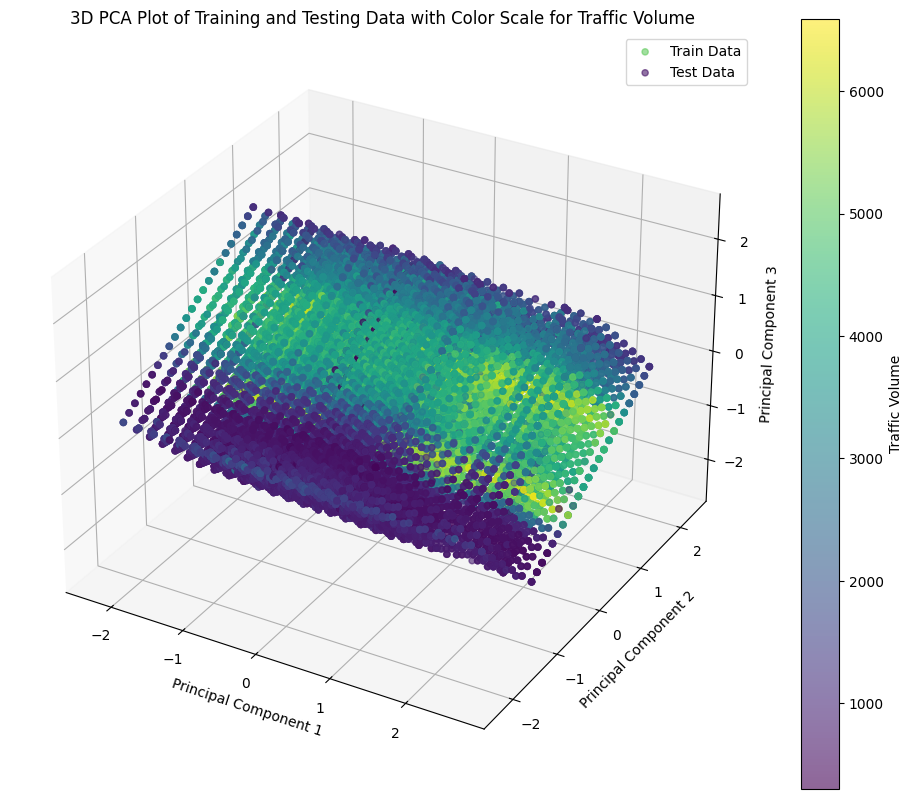

In [26]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load your data
# data = pd.read_csv('path_to_your_data.csv')
# Example structure of data assumed as mentioned earlier
X = data[['year', 'month', 'weekday', 'hour', 'isholiday']]
y = data['traffic_volume']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=100, random_state=12345, shuffle=False)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# PCA to reduce dimensions to 3
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Plotting the results in 3D
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Create a color map
cm = plt.get_cmap('viridis')

# Scale the target variable between 0 and 1 for the colormap
sc = ax.scatter(X_train_pca[:, 0], X_train_pca[:, 1], X_train_pca[:, 2], c=y_train, cmap=cm, label='Train Data', alpha=0.6)
sc = ax.scatter(X_test_pca[:, 0], X_test_pca[:, 1], X_test_pca[:, 2], c=y_test, cmap=cm, label='Test Data', alpha=0.6)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.colorbar(sc, ax=ax, label='Traffic Volume')

ax.legend()

plt.title('3D PCA Plot of Training and Testing Data with Color Scale for Traffic Volume')
plt.show()

## Listing 13-3. Creating the train test split and computing the R2 of the default model

In [27]:
# Create objects X and y
X = data[['year', 'month', 'weekday', 'hour', 'isholiday']]
y = data['traffic_volume']

# Create Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=100, random_state=12345, shuffle=False)

from sklearn.neighbors import KNeighborsRegressor
my_dt = KNeighborsRegressor()
my_dt.fit(X_train, y_train)

fcst = my_dt.predict(X_test)

from sklearn.metrics import r2_score
print(r2_score(list(y_test), list(fcst)))


0.9725269542830707


## Listing 13-4. Creating a plot on the data of the test set

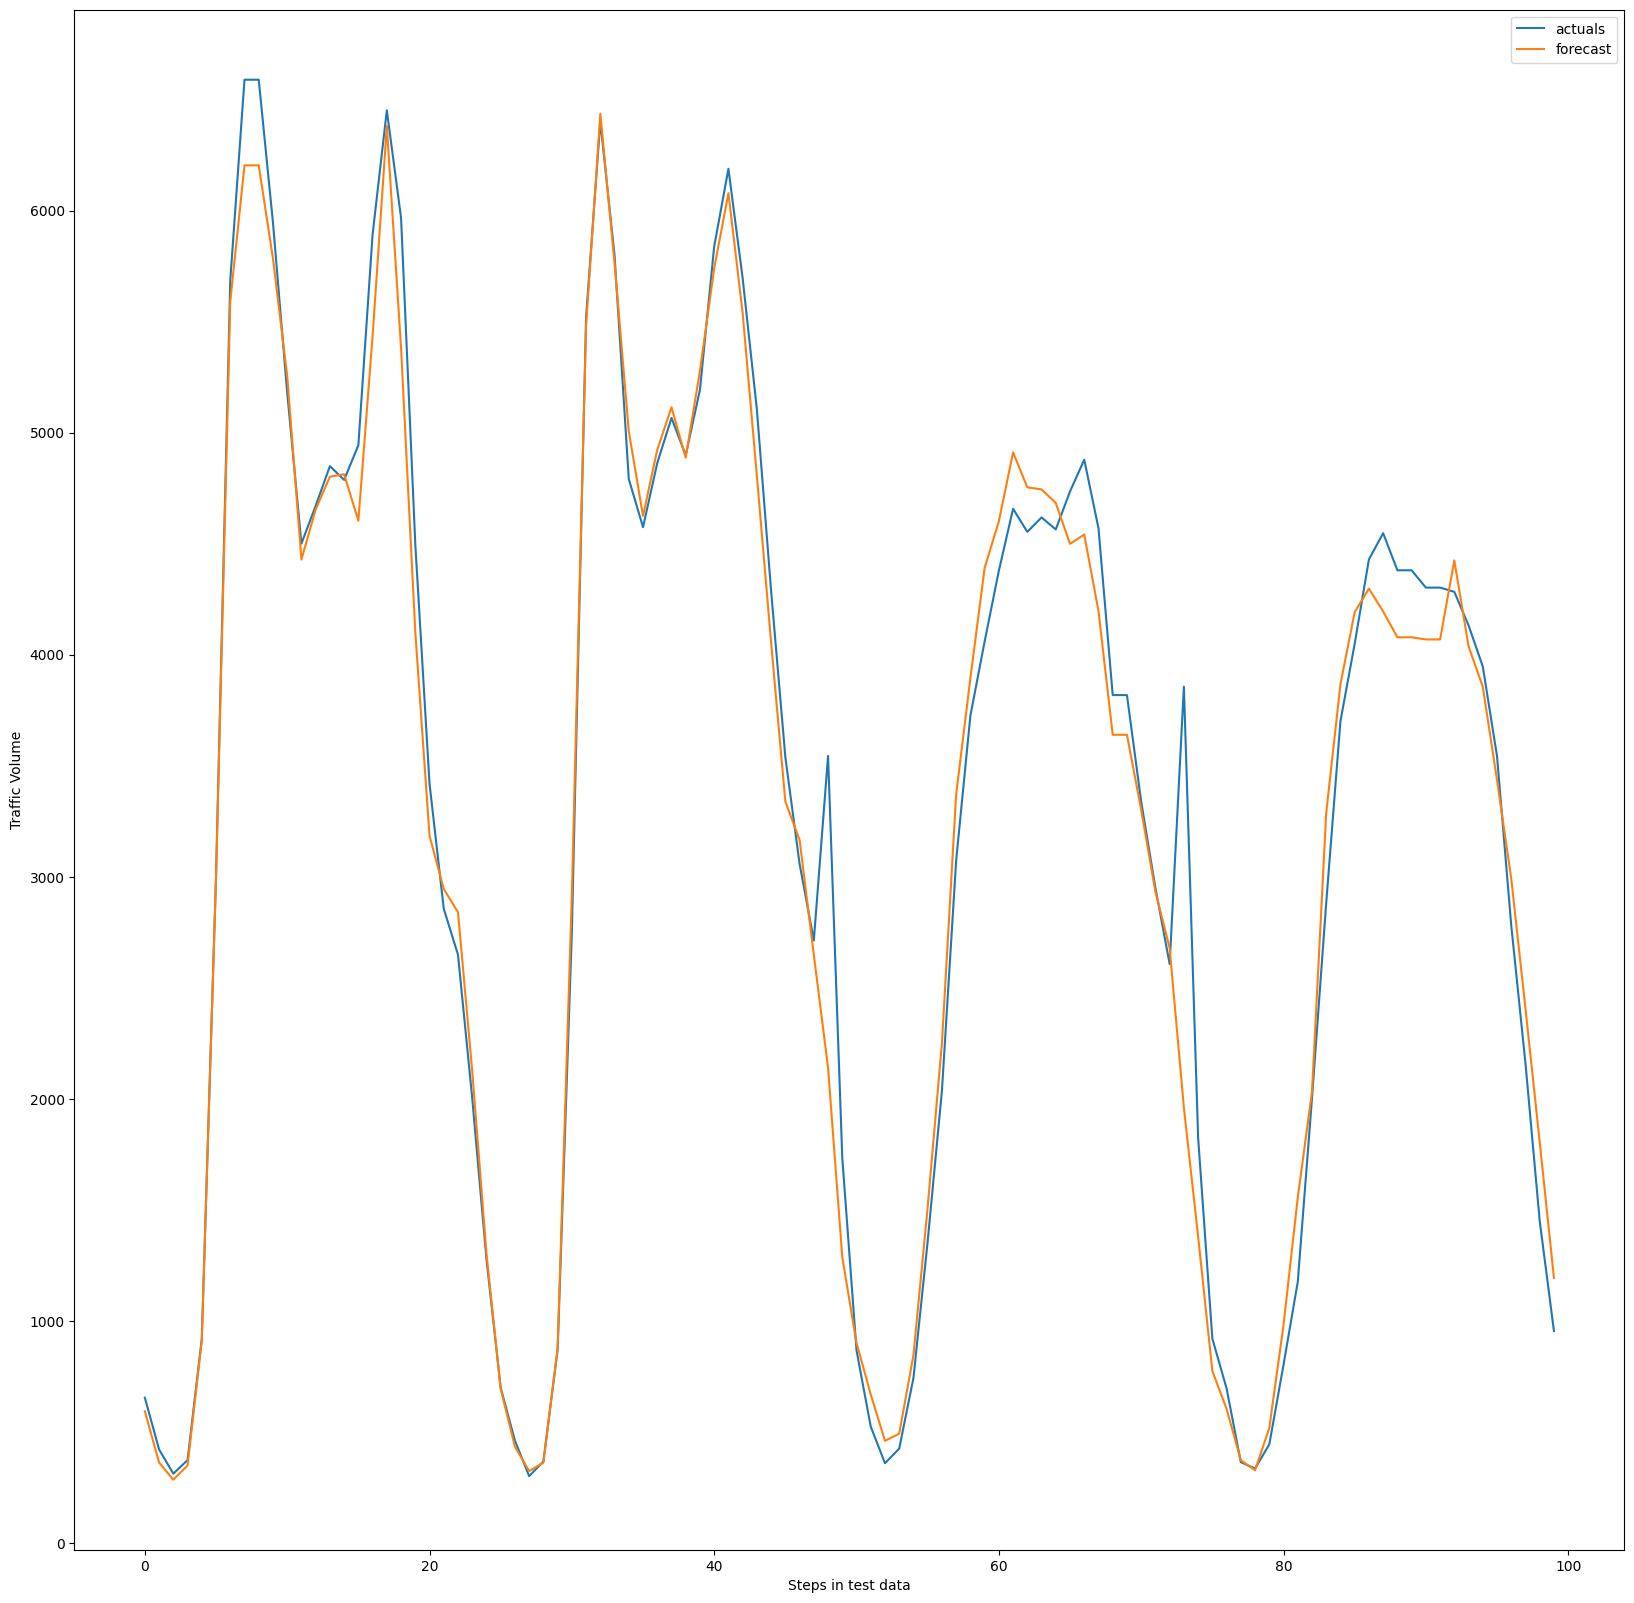

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
plt.plot(list(y_test))
plt.plot(list(fcst))
plt.legend(['actuals', 'forecast'])
plt.ylabel('Traffic Volume')
plt.xlabel('Steps in test data')
plt.show()


## Listing 13-5. Adding a grid search cross-validation to the knn model

In [29]:
from sklearn.model_selection import GridSearchCV

my_knn = GridSearchCV(KNeighborsRegressor(), 
                 {'n_neighbors':[2, 4, 6, 8, 10, 12]},
                scoring = 'r2', n_jobs = -1)

my_knn.fit(X_train, y_train)
print(r2_score(list(y_test), list(my_knn.predict(X_test))))
print(my_knn.best_estimator_)


0.9725407597388049
KNeighborsRegressor(n_neighbors=10)


## Listing 13-6. Adding a random search cross-validation to the knn model

In [30]:
from sklearn.model_selection import RandomizedSearchCV

my_knn = RandomizedSearchCV(KNeighborsRegressor(), 
                 {'n_neighbors':list(range(1, 20))},
                scoring = 'r2', n_iter=10, n_jobs = -1)

my_knn.fit(X_train, y_train)
print(r2_score(list(y_test), list(my_knn.predict(X_test))))
print(my_knn.best_estimator_)


0.9736042584419586
KNeighborsRegressor(n_neighbors=9)


# Chapter 14 - The Random Forest

## Listing 14-1. Importing the data

In [31]:
import pandas as pd
data = pd.read_csv('Ch05_Sunspots_database.csv')
data = data.iloc[:,[1,2]]


## Listing 14-2. Feature engineering

In [32]:
# Seasonality variables
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].apply(lambda x: x.year)
data['Month'] = data['Date'].apply(lambda x: x.month)

# Adding a year of lagged data
data['L1'] = data['Monthly Mean Total Sunspot Number'].shift(1)
data['L2'] = data['Monthly Mean Total Sunspot Number'].shift(2)
data['L3'] = data['Monthly Mean Total Sunspot Number'].shift(3)
data['L4'] = data['Monthly Mean Total Sunspot Number'].shift(4)
data['L5'] = data['Monthly Mean Total Sunspot Number'].shift(5)
data['L6'] = data['Monthly Mean Total Sunspot Number'].shift(6)
data['L7'] = data['Monthly Mean Total Sunspot Number'].shift(7)
data['L8'] = data['Monthly Mean Total Sunspot Number'].shift(8)
data['L9'] = data['Monthly Mean Total Sunspot Number'].shift(9)
data['L10'] = data['Monthly Mean Total Sunspot Number'].shift(10)
data['L11'] = data['Monthly Mean Total Sunspot Number'].shift(11)
data['L12'] = data['Monthly Mean Total Sunspot Number'].shift(12)


## Listing 14-3. Fitting the default Random Forest Regressor

In [33]:
# Create X and y object
data = data.dropna()
y = data['Monthly Mean Total Sunspot Number']
X = data[['Year', 'Month', 'L1', 'L2', 'L3', 'L4', 'L5', 'L6', 'L7', 'L8', 'L9', 'L10', 'L11', 'L12']]

# Create Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=12345, shuffle=False)

from sklearn.ensemble import RandomForestRegressor
my_rf = RandomForestRegressor()
my_rf.fit(X_train, y_train)
fcst = my_rf.predict(X_test)

from sklearn.metrics import r2_score
r2_score(list(y_test), list(fcst))


0.8594072807181583

## Listing 14-4. Fitting the Random Forest Regressor with hyperparameter tuning

In [34]:
from sklearn.model_selection import GridSearchCV

my_rf = GridSearchCV(RandomForestRegressor(), 
                 {'max_features':[0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95],
                 'n_estimators': [10, 50, 100, 250, 500, 750, 1000]},
                scoring = 'r2', n_jobs = -1)

my_rf.fit(X_train, y_train)
print(r2_score(list(y_test), list(my_rf.predict(X_test))))
print(my_rf.best_params_)


0.8676507620954852
{'max_features': 0.7, 'n_estimators': 750}


## Listing 14-5. Obtaining the plot of the forecast on the test data

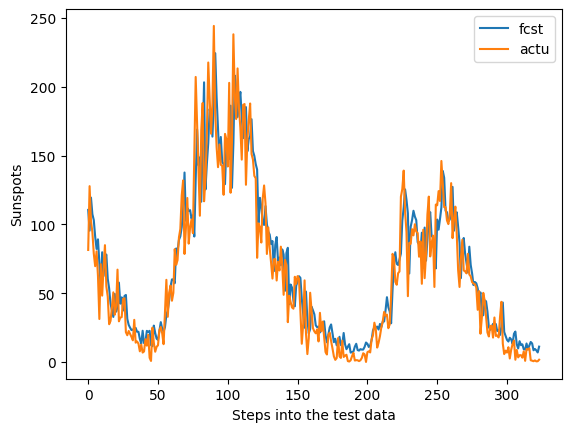

In [35]:
import matplotlib.pyplot as plt
plt.plot(list(fcst))
plt.plot(list(y_test))
plt.legend(['fcst', 'actu'])
plt.ylabel('Sunspots')
plt.xlabel('Steps into the test data')
plt.show()


## Listing 14-6. Testing out a normal distribution for the max_features

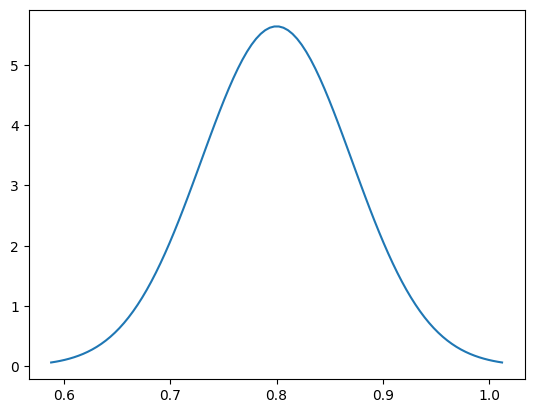

In [36]:
import numpy as np
import scipy.stats as stats
import math

mu = 0.8
variance = 0.005
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()


## Listing 14-7. Testing out a uniform distribution for the n_estimators

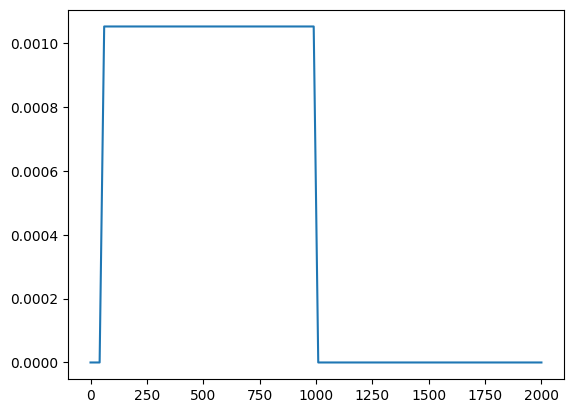

In [37]:
x = np.linspace(0, 2000, 100)
plt.plot(x, stats.uniform.pdf(x, 50, 950))
plt.show()


## Listing 14-8. RandomizedSearchCv with two distributions

In [38]:
from sklearn.model_selection import RandomizedSearchCV

# Specifying the distributions to draw from
distributions = {
    'max_features': stats.norm(0.8, math.sqrt(0.005)),
    'n_estimators': stats.randint(50, 1000)
}

# Creating the search
my_rf = RandomizedSearchCV(RandomForestRegressor(),
                           
                     distributions, n_iter=10,
                          scoring = 'r2',
                          n_jobs = -1,
                          random_state = 12345)

# Fitting the search
my_rf.fit(X_train, y_train)

# Printing the results
print(r2_score(list(y_test), list(my_rf.predict(X_test))))
print(my_rf.best_params_)


0.8678726704172063
{'max_features': 0.7024759740118218, 'n_estimators': 819}


## Listing 14-9.Feature Importances

C:\Users\ALBER\AppData\Local\Temp\ipykernel_20460\324892703.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=fi_sorted,


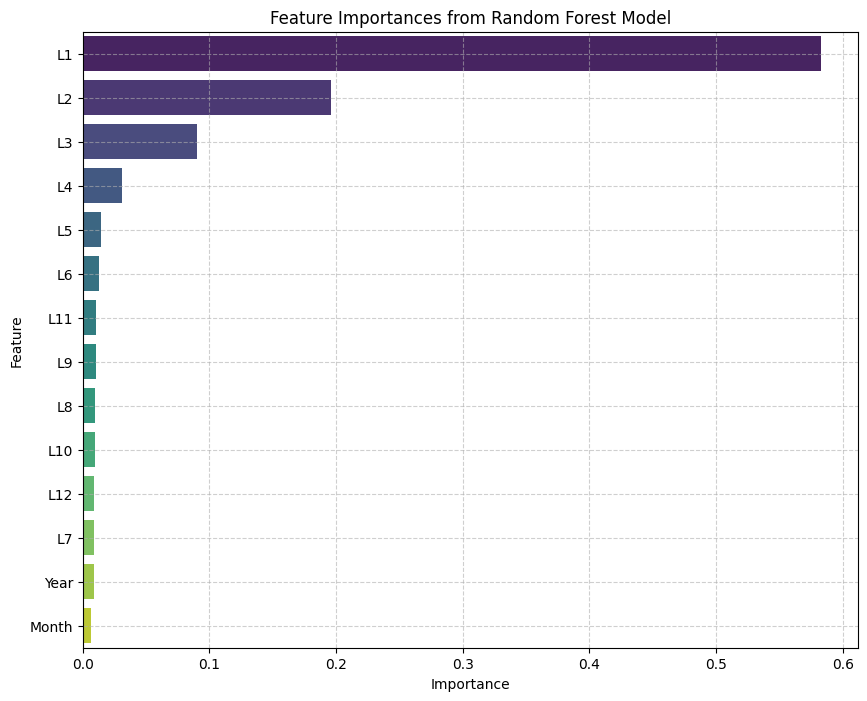

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X_train and my_rf are already defined in your context

# Create DataFrame of feature importances
fi = pd.DataFrame({
    'feature': X_train.columns,
    'importance': my_rf.best_estimator_.feature_importances_
})

# Sort the DataFrame by importance in descending order
fi_sorted = fi.sort_values('importance', ascending=False)

# Initialize the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a fancy bar plot using seaborn
sns.barplot(x='importance', y='feature', data=fi_sorted,
            palette='viridis')  # 'viridis' is a visually appealing colormap

# Add labels and title for clarity
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Random Forest Model')

# Optional: add grid
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()


# Chapter 15 - Gradient Boosting with XGBoost and LigthGBM

## Listing 15-1. Importing the data

In [40]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
# fetch dataset 
metro_interstate_traffic_volume = fetch_ucirepo(id=492) 
  
# data (as pandas dataframes) 
X = metro_interstate_traffic_volume.data.features 
y = metro_interstate_traffic_volume.data.targets 
  
# metadata 
print(metro_interstate_traffic_volume.metadata) 
  
# variable information 
print(metro_interstate_traffic_volume.variables) 

# Merge the features and target into a single DataFrame
data = pd.concat([X, y], axis=1)

data.head()

{'uci_id': 492, 'name': 'Metro Interstate Traffic Volume', 'repository_url': 'https://archive.ics.uci.edu/dataset/492/metro+interstate+traffic+volume', 'data_url': 'https://archive.ics.uci.edu/static/public/492/data.csv', 'abstract': 'Hourly Minneapolis-St Paul, MN traffic volume for westbound I-94. Includes weather and holiday features from 2012-2018.', 'area': 'Other', 'tasks': ['Regression'], 'characteristics': ['Multivariate', 'Sequential', 'Time-Series'], 'num_instances': 48204, 'num_features': 8, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['traffic_volume'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2019, 'last_updated': 'Fri Mar 15 2024', 'dataset_doi': '10.24432/C5X60B', 'creators': ['John Hogue'], 'intro_paper': None, 'additional_info': {'summary': 'Hourly Interstate 94 Westbound traffic volume for MN DoT ATR station 301, roughly midway between Minneapolis and St Paul, MN. Hourly weath

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


## Listing 15-2. Applying the same feature engineering as done previously for the kNN model

In [41]:
data['year'] = data['date_time'].apply(lambda x: int(x[:4]))
data['month'] = data['date_time'].apply(lambda x: int(x[5:7]))
data['weekday'] = pd.to_datetime(data['date_time']).apply(lambda x: x.weekday())
data['hour'] = pd.to_datetime(data['date_time']).apply(lambda x: x.hour)
data['isholiday'] = (data['holiday'] == 'None').apply(float)


## Listing 15-3. Applying the default XGBoost model

In [42]:
pip install xgboost -q

Note: you may need to restart the kernel to use updated packages.


In [43]:
# Create objects X and y
X = data[['year', 'month', 'weekday', 'hour', 'isholiday']]
y = data['traffic_volume']

# Create Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=100, random_state=12345, shuffle=False)

from xgboost import XGBRegressor
my_xgb = XGBRegressor()
my_xgb.fit(X_train, y_train)

xgb_fcst = my_xgb.predict(X_test)

from sklearn.metrics import r2_score
print(r2_score(list(y_test), list(xgb_fcst)))


0.9726292617325978


## Listing 15-4. Applying the default LightGBM model

In [44]:
pip install lightgbm -q

Note: you may need to restart the kernel to use updated packages.


In [45]:
from lightgbm import LGBMRegressor
my_lgbm = LGBMRegressor()
my_lgbm.fit(X_train, y_train)

lgbm_fcst = my_lgbm.predict(X_test)

print(r2_score(list(y_test), list(lgbm_fcst)))


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000867 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 52
[LightGBM] [Info] Number of data points in the train set: 48104, number of used features: 4
[LightGBM] [Info] Start training from score 3259.693685
0.9728060730071293


## Listing 15-5. Create a graph to compare the XGBoost and LightGBM forecast to the actuals

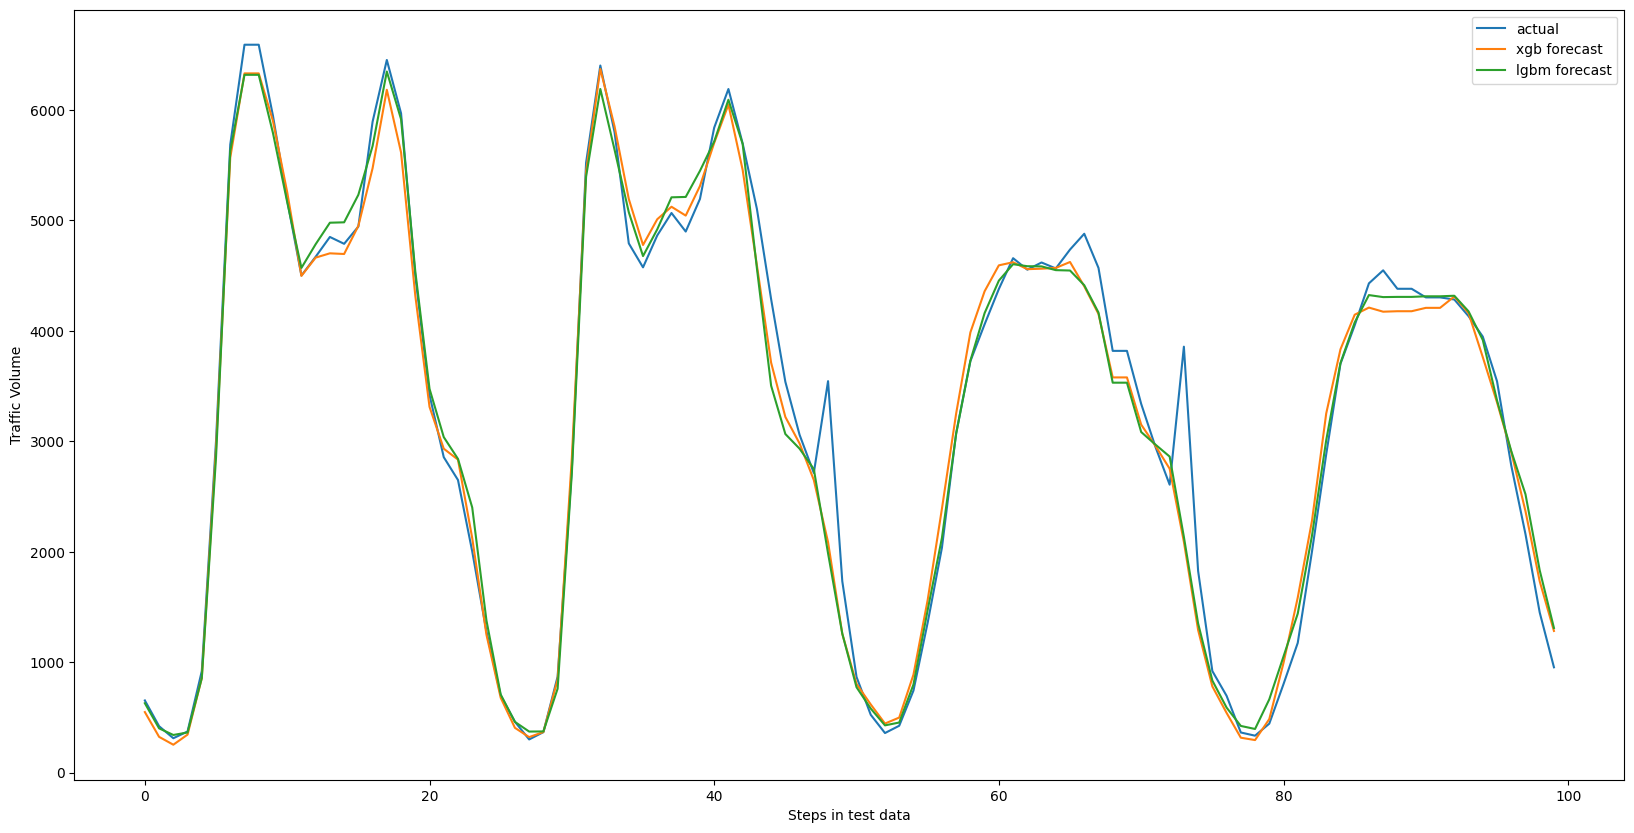

In [46]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(list(y_test))
plt.plot(list(xgb_fcst))
plt.plot(list(lgbm_fcst))
plt.legend(['actual', 'xgb forecast', 'lgbm forecast'])
plt.ylabel('Traffic Volume')
plt.xlabel('Steps in test data')
plt.show()


## Listing 15-4. Applying a Bayesian Optimization to the xgboost

In [47]:
pip install scikit-optimize -q

Note: you may need to restart the kernel to use updated packages.


In [48]:
pip install scikit-optimize

Note: you may need to restart the kernel to use updated packages.


In [49]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
import random
random.seed(0)

xgb_opt = BayesSearchCV(
    XGBRegressor(),
    {
        'learning_rate': (10e-6, 1.0, 'log-uniform'),
        'max_depth': Integer(0, 50, 'uniform'),
        'n_estimators' : (10, 1000, 'log-uniform'),
    },
    n_iter=10,
    cv=3
)

xgb_opt.fit(X_train, y_train)
xgb_tuned_fcst = xgb_opt.best_estimator_.predict(X_test)
r2_score(list(y_test), list(xgb_tuned_fcst))


0.9722896683082787

## Listing 15-5. Applying a Bayesian Optimization to the LightGBM

In [50]:
random.seed(0)
lgbm_opt = BayesSearchCV(
    LGBMRegressor(),
    {
        'learning_rate': (10e-6, 1.0, 'log-uniform'),
        'max_depth': Integer(-1, 50, 'uniform'),
        'n_estimators' : (10, 1000, 'log-uniform'),
    },
    n_iter=10,
    cv=3
)

lgbm_opt.fit(X_train, y_train)

lgbm_tuned_fcst = lgbm_opt.best_estimator_.predict(X_test)
r2_score(list(y_test), list(lgbm_tuned_fcst))


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000193 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 49
[LightGBM] [Info] Number of data points in the train set: 32069, number of used features: 4
[LightGBM] [Info] Start training from score 3257.167888
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set n

0.9738727636974511

## Listing 15-6. Plotting the two tuned models

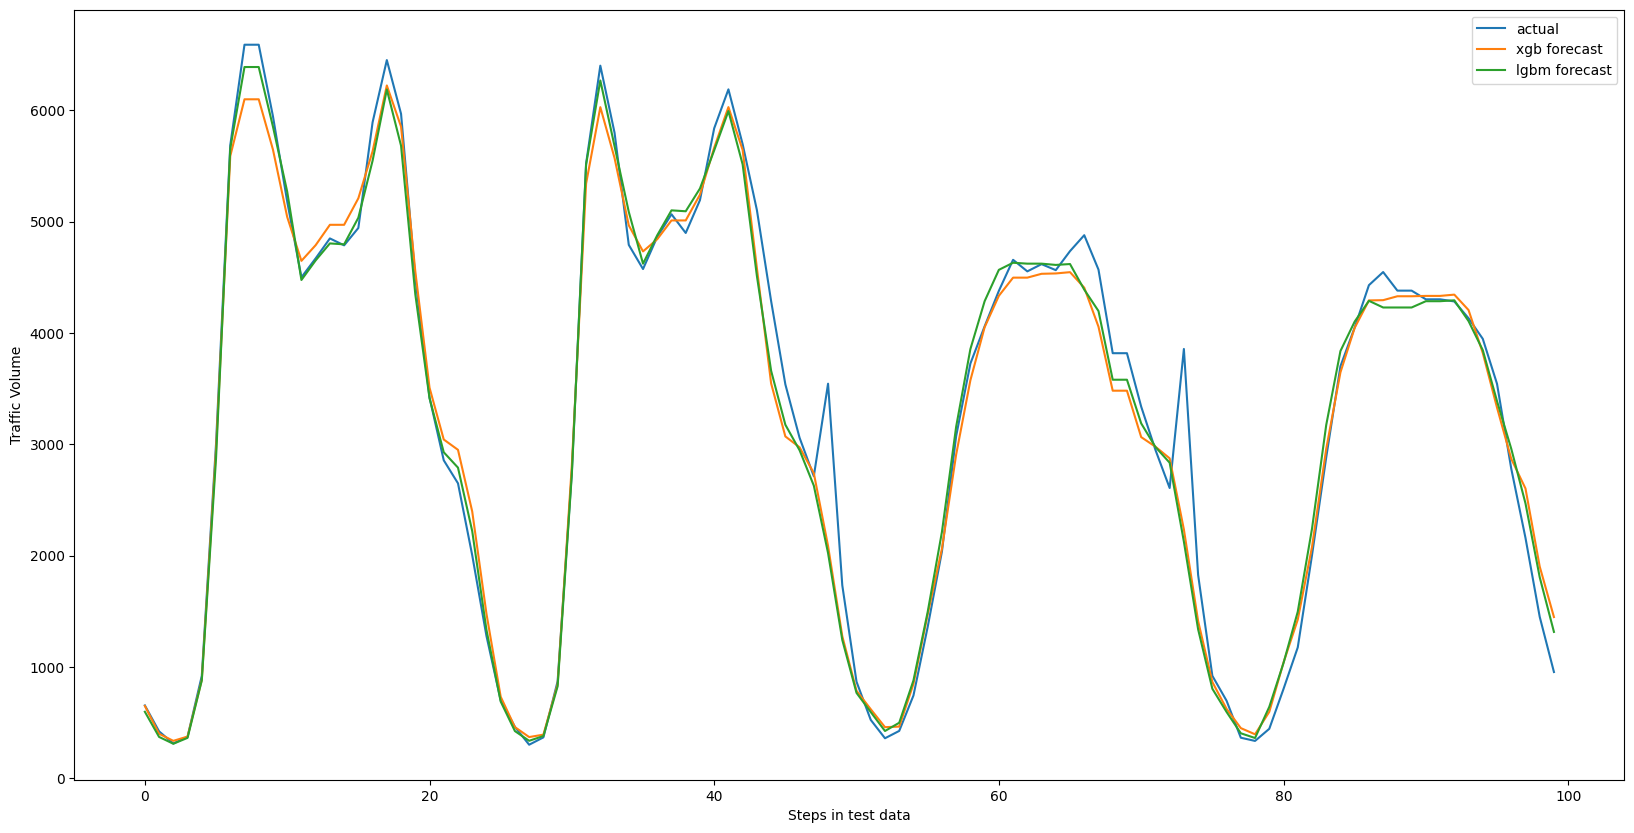

In [51]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(list(y_test))
plt.plot(list(xgb_tuned_fcst))
plt.plot(list(lgbm_tuned_fcst))
plt.legend(['actual', 'xgb forecast', 'lgbm forecast'])
plt.ylabel('Traffic Volume')
plt.xlabel('Steps in test data')
plt.show()

In [52]:
pip install nbformat

Note: you may need to restart the kernel to use updated packages.
